# Atividade de Aula 3



In [55]:
from google.colab import files
import pandas as pd
import io

In [56]:
uploaded_file=files.upload()

Saving student_exam_data_new.csv to student_exam_data_new (1).csv


In [57]:
# Importando a Biblioteca

import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.patches as patches

# Leitura do arquivo enviado
df = pd.read_csv('/content/student_exam_data_new.csv')

df.head()


,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


# Realizando a Seleção das Features para uma regressão Linear

In [58]:
X = df[['Study Hours', 'Previous Exam Score']].values   # Features numéricas
y = df['Pass/Fail'].values.reshape(-1, 1)          # Target

# Realizando a divisão em treino e teste

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Normalizando com (StandardScaler)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Realizando a conversão para tensores

In [72]:
X_train_tensor = torch.FloatTensor(X_train)
Y_train_tensor = torch.FloatTensor(y_train)
print("Treino X",X_train)
print("Treino y", y_train)

X_test_tensor = torch.FloatTensor(X_test)
Y_test_tensor = torch.FloatTensor(y_test)
print("Teste X",X_test)


Treino X [[ 0.  0.  3. ... 13.  4.  0.]
 [ 0.  0.  9. ...  3.  0.  0.]
 [ 0.  0.  0. ...  6.  0.  0.]
 ...
 [ 0.  0.  9. ... 16.  2.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  1.  0.  0.]]
Treino y [6 0 0 ... 2 7 1]
Teste X [[ 0.  0.  0. ... 14.  5.  0.]
 [ 0.  0. 11. ...  1.  0.  0.]
 [ 0.  0.  8. ...  8.  0.  0.]
 ...
 [ 0.  0.  7. ... 10.  0.  0.]
 [ 0.  0.  7. ... 16.  4.  0.]
 [ 0.  0. 14. ...  5.  0.  0.]]


# Realização um modelo de regressão linear
### um neurônio com saída contínua

In [62]:
model = nn.Linear(2, 1)   # 2 inputs → 1 output
print(model)


Linear(in_features=2, out_features=1, bias=True)


# Realizando a Definição da Loss e do Otimizador

In [63]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
print(criterion)
print(optimizer)


MSELoss()
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


# Realização do Treino

In [64]:
epochs = 500
losses = []

for e in range(epochs):
    inputs = Variable(X_train_tensor)
    targets = Variable(Y_train_tensor)

    outputs = model(inputs)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (e+1) % 50 == 0:
        print(f"Epoch [{e+1}/{epochs}]  Loss: {loss.item():.4f}")


Epoch [50/500]  Loss: 0.1792
Epoch [100/500]  Loss: 0.1155
Epoch [150/500]  Loss: 0.1071
Epoch [200/500]  Loss: 0.1059
Epoch [250/500]  Loss: 0.1058
Epoch [300/500]  Loss: 0.1058
Epoch [350/500]  Loss: 0.1058
Epoch [400/500]  Loss: 0.1058
Epoch [450/500]  Loss: 0.1058
Epoch [500/500]  Loss: 0.1058


# Realizando a Avaliação no conjunto de testes

In [65]:
with torch.no_grad():
    pred = model(X_test_tensor)
    test_loss = criterion(pred, Y_test_tensor)

print("Loss no teste:", test_loss.item())


Loss no teste: 0.12176723778247833


# Gráfico representa a relação entre as horas de estudo e a nota anterior do exame, com algumas informações adicionais.

## Funções utilizadas no Gráfico:
### Scatterplot
### Pontos separados por Pass/Fail
### Linha de regressão
### Legenda e títulos organizados

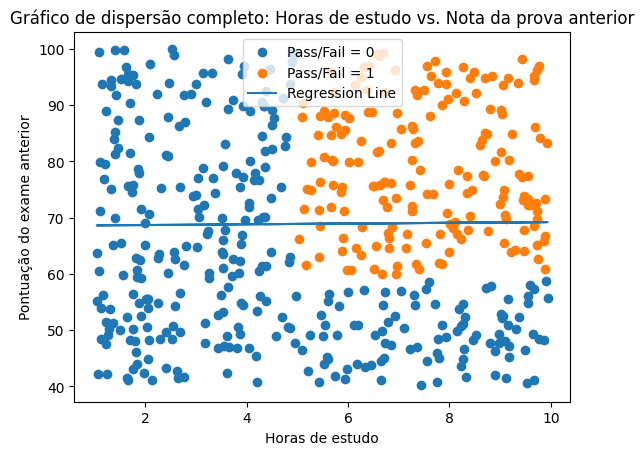

In [66]:
# Preparando o Modelo
X = sm.add_constant(df['Study Hours'])
model = sm.OLS(df['Previous Exam Score'], X).fit()
pred = model.predict(X)

# Plot da Figura
plt.figure()

# Scatterplot para each Pass/Fail categoria
for label, group in df.groupby('Pass/Fail'):
    plt.scatter(group['Study Hours'], group['Previous Exam Score'], label=f"Pass/Fail = {label}")

# Linha de Regressão
plt.plot(df['Study Hours'], pred, label="Regression Line")

# Etiquetas e Títulos
plt.xlabel("Horas de estudo")
plt.ylabel("Pontuação do exame anterior")
plt.title("Gráfico de dispersão completo: Horas de estudo vs. Nota da prova anterior")
plt.legend()

plt.show()


# Gráfico que representa um pipeline completo de aprendizado de máquina utilizando digits do scikit-learn aplicando a regressão Softmax para reconhecer os digitos escritos a mão.

## Função realizada no Gráfico:

### carregamento do dataset digits
### treinmento da regressão Softmax
### prevendo um dígito
### mostrando à imagem correspondente
### gerando a  matriz de confusão
### gerando o relatório de classificação
### exibindo as probabilidades Softmax

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Dígito previsto: 6

Probabilidades Softmax:
0: 0.0000
1: 0.0000
2: 0.0000
3: 0.0000
4: 0.0000
5: 0.0000
6: 1.0000
7: 0.0000
8: 0.0000
9: 0.0000


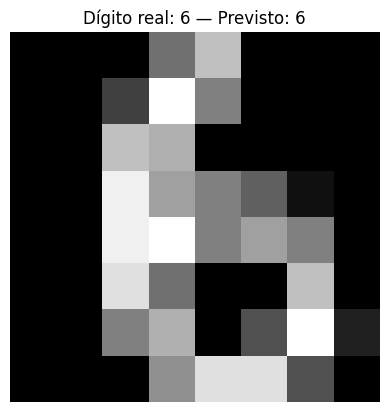


Acurácia: 0.975


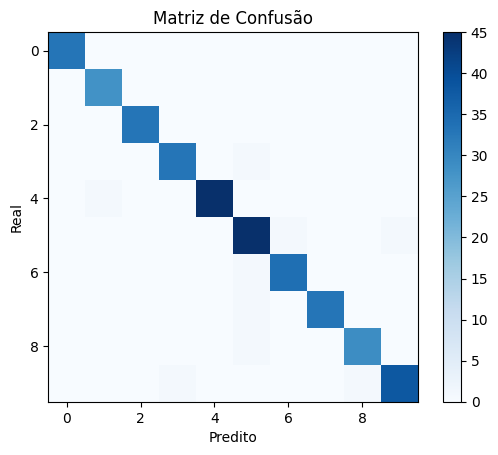


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



In [67]:

# 1. Carregar dataset digits

digits = load_digits()
X = digits.data
y = digits.target
images = digits.images


# 2. Separar treino e teste

X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X, y, images, test_size=0.2, random_state=42
)


# 3. Treinar regressão Softmax

model = LogisticRegression(max_iter=200, multi_class='multinomial')
model.fit(X_train, y_train)


# 4. Fazer predição em 1 exemplo

sample = X_test[0].reshape(1, -1)
prediction = model.predict(sample)[0]
probs = model.predict_proba(sample)[0]

print("Dígito previsto:", prediction)
print("\nProbabilidades Softmax:")
for i, p in enumerate(probs):
    print(f"{i}: {p:.4f}")

# 5. Exibir imagem correspondente

plt.figure()
plt.imshow(img_test[0], cmap='gray')
plt.title(f"Dígito real: {y_test[0]} — Previsto: {prediction}")
plt.axis("off")
plt.show()


# 6. Avaliação completa

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("\nAcurácia:", acc)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.colorbar()
plt.show()

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))






# Gráfico para mostrar um Grafo Computacional com Gradientes

## Contexto desse Gráfico:

### Nodos representando: w, b, wx+b, Cost
### Setas mostrando o fluxo direto da computação
### Setas tracejadas mostrando os gradientes
### Fórmulas LaTeX renderizadas (como ∂C/∂w)


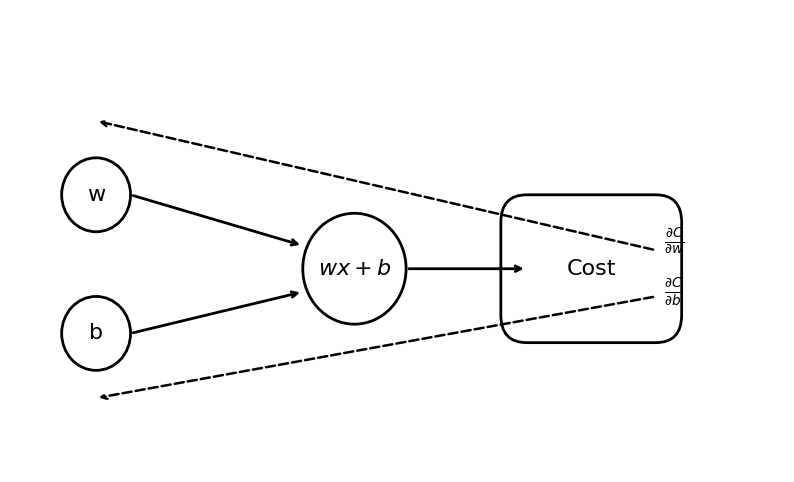

In [68]:
# Criando a Figura
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.axis("off")

# ---- NÓS ----
# w
circle_w = patches.Circle((1, 4), 0.4, fill=False, linewidth=2)
ax.add_patch(circle_w)
ax.text(1, 4, "w", ha="center", va="center", fontsize=16)

# b
circle_b = patches.Circle((1, 2.5), 0.4, fill=False, linewidth=2)
ax.add_patch(circle_b)
ax.text(1, 2.5, "b", ha="center", va="center", fontsize=16)

# wx + b
circle_sum = patches.Circle((4, 3.2), 0.6, fill=False, linewidth=2)
ax.add_patch(circle_sum)
ax.text(4, 3.2, r"$wx + b$", ha="center", va="center", fontsize=16)

# Custo
box_cost = patches.FancyBboxPatch(
    (6, 2.7), 1.5, 1, boxstyle="round,pad=0.3", linewidth=2, fill=False
)
ax.add_patch(box_cost)
ax.text(6.75, 3.2, "Cost", ha="center", va="center", fontsize=16)

# ---- SETAS ----
# w -> wx+b
ax.annotate("", xy=(3.4, 3.45), xytext=(1.4, 4),
            arrowprops=dict(arrowstyle="->", linewidth=2))
# b -> wx+b
ax.annotate("", xy=(3.4, 2.95), xytext=(1.4, 2.5),
            arrowprops=dict(arrowstyle="->", linewidth=2))

# wx+b -> Cost
ax.annotate("", xy=(6, 3.2), xytext=(4.6, 3.2),
            arrowprops=dict(arrowstyle="->", linewidth=2))

# Gradiente dC/dw
ax.annotate("", xy=(1, 4.8), xytext=(7.5, 3.4),
            arrowprops=dict(arrowstyle="->", linestyle="--", linewidth=1.8))
ax.text(7.6, 3.5, r"$\frac{\partial C}{\partial w}$",
        fontsize=14, va="center")

# Gradiente dC/db
ax.annotate("", xy=(1, 1.8), xytext=(7.5, 2.9),
            arrowprops=dict(arrowstyle="->", linestyle="--", linewidth=1.8))
ax.text(7.6, 2.95, r"$\frac{\partial C}{\partial b}$",
        fontsize=14, va="center")

plt.xlim(0, 9)
plt.ylim(1, 6)
plt.show()


# Gráfico com Regressão Linear com PyTorch

## Contexto do Gráfico

### Gera dados seguindo uma função linear
### y = 3x + 2 (com um pouco de ruído)
### nn.Linear(1,1) → perfeito para regressão simples
### Usa MSE como perda e SGD como otimizador
### Treina em loop com backpropagation
### PyTorch faz o cálculo dos gradientes automaticamente com loss.backward().
### Mostra os parâmetros aprendidos
### Eles devem ficar bem próximos de w ≈ 3 e b ≈ 2.
### Plota os dados reais + linha aprendida

Epoch 50/300, Loss = 0.6400
Epoch 100/300, Loss = 0.6141
Epoch 150/300, Loss = 0.5984
Epoch 200/300, Loss = 0.5888
Epoch 250/300, Loss = 0.5830
Epoch 300/300, Loss = 0.5795

Parâmetros aprendidos:
w = 3.0061, b = 1.8313


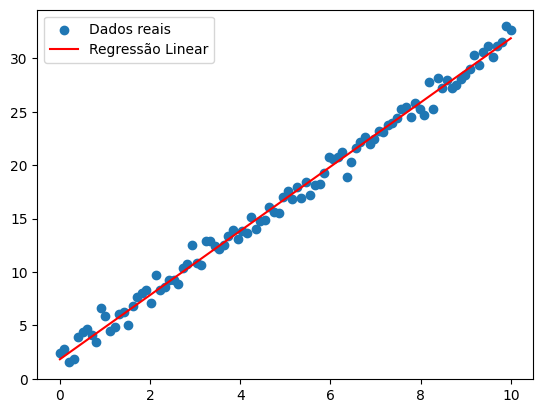

In [69]:

# y = 3x + 2
X = torch.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X + 2 + torch.randn(X.size()) * 0.8  # adiciona ruído


# 2. Criando o modelo linear

model = nn.Linear(in_features=1, out_features=1)


# 3. Função de perda e otimizador

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


# 4. Treinamento

epochs = 300
for epoch in range(epochs):
    # forward
    y_pred = model(X)
    loss = criterion(y_pred, y)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # print a cada 50 épocas
    if (epoch+1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss = {loss.item():.4f}")


# 5. Resultados

print("\nParâmetros aprendidos:")
w = model.weight.item()
b = model.bias.item()
print(f"w = {w:.4f}, b = {b:.4f}")


# 6. Plot do resultado

plt.scatter(X.numpy(), y.numpy(), label="Dados reais")
plt.plot(X.numpy(), model(X).detach().numpy(), color="red", label="Regressão Linear")
plt.legend()
plt.show()


# Gráfico com Regressão Linear com PyTorch + GPU CUDA

## Contexto do Gráfico
### Verificação automática de GPU
### Envio do modelo e dados para a GPU
### Treinamento acelerado
### Predição e plot final (rodando na CPU)

Usando dispositivo: cpu
Epoch 50/300  Loss = 1.1637
Epoch 100/300  Loss = 0.9193
Epoch 150/300  Loss = 0.7707
Epoch 200/300  Loss = 0.6804
Epoch 250/300  Loss = 0.6255
Epoch 300/300  Loss = 0.5921

Parâmetros aprendidos:
w = 3.0096
b = 1.7880


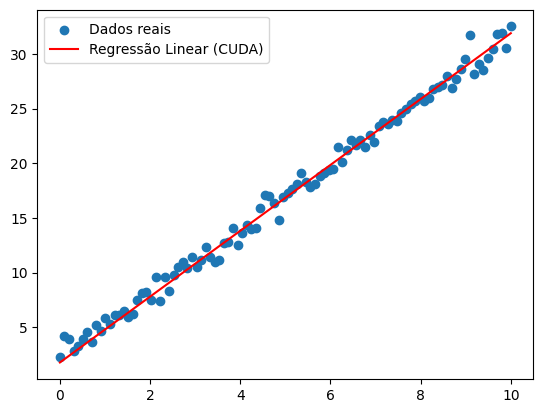

In [70]:
# 0. Verificar GPU

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Usando dispositivo:", device)


# 1. Dataset sintético

# y = 3x + 2 + ruído
X = torch.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X + 2 + torch.randn(X.size()) * 0.8

# Enviar dados para a GPU
X = X.to(device)
y = y.to(device)


# 2. Modelo Linear

model = nn.Linear(1, 1).to(device)


# 3. Função de perda e otimizador

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


# 4. Treinamento

epochs = 300
for epoch in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}  Loss = {loss.item():.4f}")


# 5. Parâmetros aprendidos

w = model.weight.item()
b = model.bias.item()
print(f"\nParâmetros aprendidos:\nw = {w:.4f}\nb = {b:.4f}")


# 6. Plot (usando CPU)

# trazer predições para CPU
X_cpu = X.cpu()
y_cpu = y.cpu()
pred_cpu = model(X).detach().cpu()

plt.scatter(X_cpu.numpy(), y_cpu.numpy(), label="Dados reais")
plt.plot(X_cpu.numpy(), pred_cpu.numpy(), color="red", label="Regressão Linear (CUDA)")
plt.legend()
plt.show()



# Gráfico de Avaliação com Erro absoluto e predição vs valores reais

## Contexto do Gráfico:

### Curva de perda
### Gráfico de erro absoluto
### Predições vs valores reais

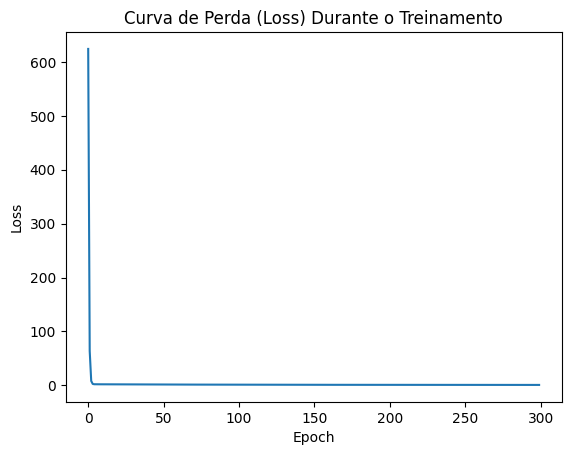

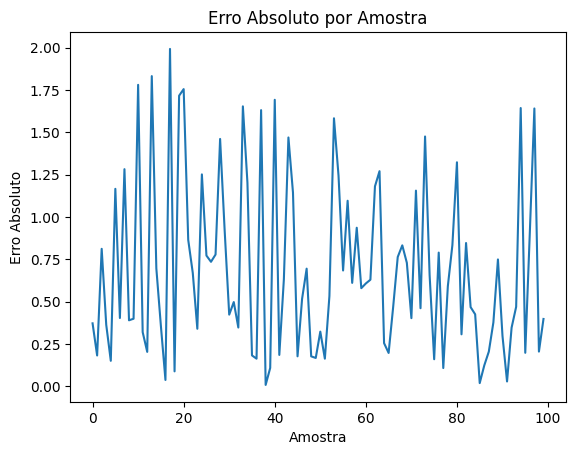

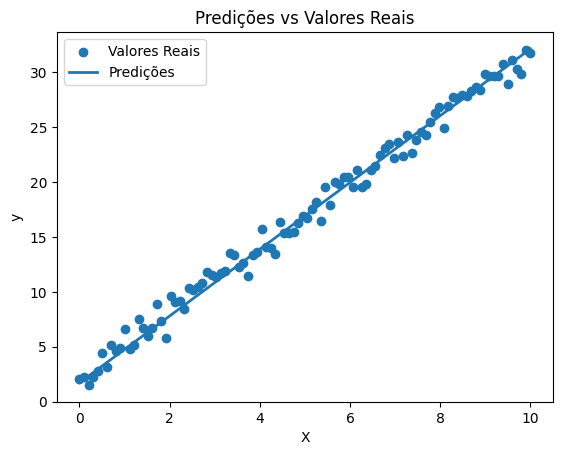

In [71]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset
X = torch.linspace(0, 10, 100).reshape(-1, 1).to(device)
y = 3 * X + 2 + torch.randn(X.size()).to(device) * 0.8

# Model
model = nn.Linear(1, 1).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

losses = []

# Treino
epochs = 300
for epoch in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

# Trazendo tensores para a CPU para plotagem.
X_cpu = X.cpu()
y_cpu = y.cpu()
pred_cpu = model(X).detach().cpu()

# Plot 1: Loss Curve
plt.figure()
plt.plot(losses)
plt.title("Curva de Perda (Loss) Durante o Treinamento")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Plot 2: Erro Absoluto
absolute_error = (pred_cpu - y_cpu).abs()

plt.figure()
plt.plot(absolute_error.numpy())
plt.title("Erro Absoluto por Amostra")
plt.xlabel("Amostra")
plt.ylabel("Erro Absoluto")
plt.show()

# Plot 3: Predições vs Valores Reais
plt.figure()
plt.scatter(X_cpu.numpy(), y_cpu.numpy(), label="Valores Reais")
plt.plot(X_cpu.numpy(), pred_cpu.numpy(), label="Predições", linewidth=2)
plt.title("Predições vs Valores Reais")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


# Aprendizado e Contexto da Elabboração:

Coloquei de início uma regressão linar separando o treino e teste, normalizando os dados com StandadScaler, seguindo o fluxo de converções para tensores,
criei um modelo de regressão e fiz uma definição da LOSS e do otimizador, no final coloquei o campo de treino e realizei uma avaliação para amostragem,após eu fiz um contexto de gráficos que eu mais utilizei nos exercícios anteriores,
colocando a descriação de cada um para ficar mais fácil o entendimento.
